In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve
import warnings
#ignoring the wrangings
warnings.filterwarnings('ignore')

In [87]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\creditcard.csv")

In [88]:
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Exploratory data analysis 

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [90]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [91]:
data.duplicated().sum()

1081

In [92]:
data.drop_duplicates(inplace = True)

In [93]:
data[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


In [94]:
print(f"the average time for each individual in the process is {np.round(data.Time.max()/data.Time.count(),2)} min")

the average time for each individual in the process is 0.61 min


In [95]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


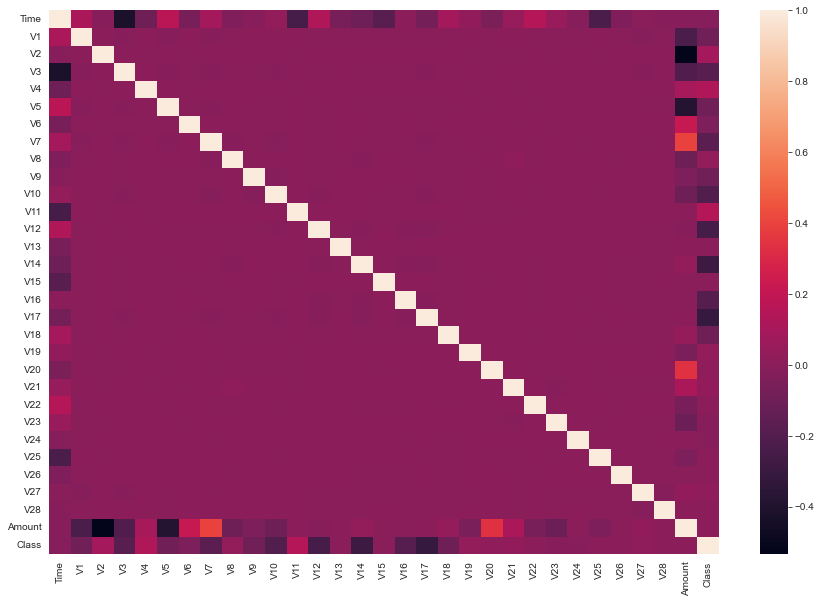

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())
plt.show()

In [97]:
end=data.shape[0]
prev=np.array(data.iloc[0:end-1,[0]])
print(prev[0:7])

[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [4.]]


In [98]:
Next=np.array(data.iloc[1:,[0]])
print(Next[0:7])

[[0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [4.]
 [7.]]


In [99]:
ProTime=np.array([0])
ProTime=np.append(ProTime,Next-prev)
print(ProTime[0:7])


[0. 0. 1. 0. 1. 0. 2.]


In [100]:
data['process_dauration']=ProTime

In [101]:
data['process_dauration'].head(20)

0     0.0
1     0.0
2     1.0
3     0.0
4     1.0
5     0.0
6     2.0
7     3.0
8     0.0
9     2.0
10    1.0
11    0.0
12    0.0
13    1.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    1.0
Name: process_dauration, dtype: float64

In [102]:
data_sample=data[['Time','Amount','process_dauration','Class']].sample(20000,replace=False,random_state=2023)

In [103]:
data_sample.head()

,Time,Amount,process_dauration,Class
73096,54976.0,19.97,0.0,0
67028,52330.0,474.79,1.0,0
155766,106331.0,11.27,1.0,0
98769,66808.0,6.08,0.0,0
207347,136632.0,455.74,1.0,0


In [104]:
data.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [105]:
data_sample.Amount.describe()

count    20000.000000
mean        86.538308
std        226.033440
min          0.000000
25%          5.490000
50%         22.000000
75%         79.000000
max       8790.260000
Name: Amount, dtype: float64

### Amount

In [106]:
AmountForEachDauration=data_sample.groupby('process_dauration')['Amount'].mean()
AmountForEachDauration.head(20)

process_dauration
0.0      85.281712
1.0      90.340666
2.0      79.871590
3.0      71.635683
4.0      90.917500
5.0     106.877647
6.0      82.338293
7.0      39.281200
8.0      73.703043
9.0      70.850000
10.0     35.850833
11.0     76.716667
12.0      5.455000
13.0     35.295000
14.0     17.358333
16.0      0.930000
19.0     70.330000
22.0     12.890000
26.0     53.400000
Name: Amount, dtype: float64

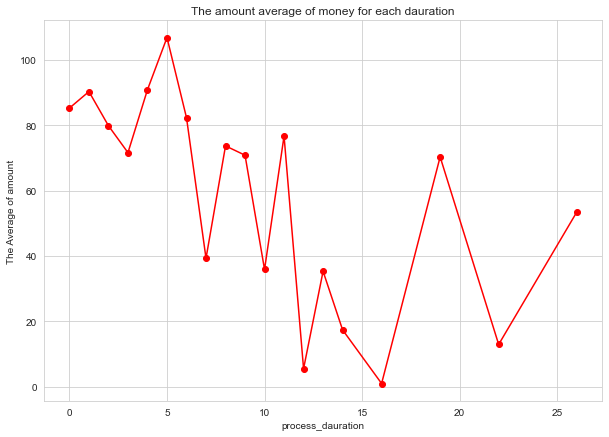

In [107]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
AmountForEachDauration.plot(kind='line',color='r',linewidth=1.5,marker='o')
plt.title("The amount average of money for each dauration")
plt.ylabel('The Average of amount')
plt.show()

In [108]:
AmountForEachClass=data_sample.groupby('Class')['Amount'].mean()
AmountForEachClass.head(30)

Class
0    86.581454
1    62.611667
Name: Amount, dtype: float64

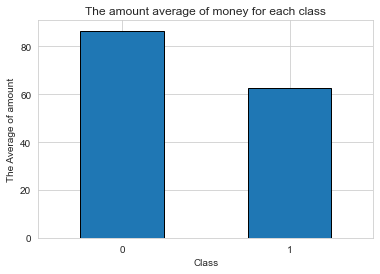

In [109]:
AmountForEachClass.plot(kind='bar',edgecolor='k')
plt.xticks(rotation=360)
plt.title("The amount average of money for each class")
plt.ylabel('The Average of amount')
plt.show()

The amount of money for each individual do a process is $90

The amount of money for each individual has been stolen is $142

### Class

In [110]:
data_sample['Class'].value_counts()


0    19964
1       36
Name: Class, dtype: int64

In [111]:
data_sample['Class'].value_counts(normalize=True)

0    0.9982
1    0.0018
Name: Class, dtype: float64

### process dauration

In [112]:
data.process_dauration.value_counts()

0.0     159135
1.0     100059
2.0      15620
3.0       4156
4.0       1807
5.0        961
6.0        619
7.0        380
8.0        298
9.0        200
10.0       138
11.0        86
12.0        61
13.0        56
14.0        33
16.0        26
15.0        23
17.0        14
19.0        12
18.0         9
20.0         7
21.0         5
26.0         4
22.0         4
32.0         4
28.0         3
25.0         2
24.0         2
27.0         1
23.0         1
Name: process_dauration, dtype: int64

In [113]:
data.process_dauration.value_counts(normalize=True)

0.0     0.560876
1.0     0.352661
2.0     0.055053
3.0     0.014648
4.0     0.006369
5.0     0.003387
6.0     0.002182
7.0     0.001339
8.0     0.001050
9.0     0.000705
10.0    0.000486
11.0    0.000303
12.0    0.000215
13.0    0.000197
14.0    0.000116
16.0    0.000092
15.0    0.000081
17.0    0.000049
19.0    0.000042
18.0    0.000032
20.0    0.000025
21.0    0.000018
26.0    0.000014
22.0    0.000014
32.0    0.000014
28.0    0.000011
25.0    0.000007
24.0    0.000007
27.0    0.000004
23.0    0.000004
Name: process_dauration, dtype: float64

# Building the model

In [114]:
y=pd.DataFrame(data,columns=['Class'])
x=data.drop(['Class','process_dauration'],axis=1)

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22)

In [116]:
x_train.shape

(221306, 30)

In [117]:
x_test.shape

(62420, 30)

In [118]:
log=LogisticRegression()

In [119]:
log.fit(x_train,y_train)

LogisticRegression()

In [120]:
y_pred=log.predict(x_train)

In [121]:
print(f"Training data score is {accuracy_score(y_train,y_pred)}")

Training data score is 0.9990059013311885


In [122]:
y_pred2=log.predict(x_test)

In [123]:
print(f"Testing data score is {accuracy_score(y_test,y_pred2)}")

Testing data score is 0.9987343800064082


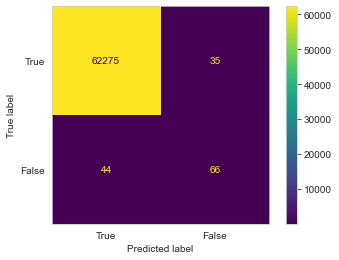

In [125]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred2)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
cm_display.plot()
plt.grid(None)
plt.show()

In [128]:
print("The classification report :")
target_names = ['class 0','class 1']
print(classification_report(y_test, y_pred2,target_names=target_names))

The classification report :
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     62310
     class 1       0.65      0.60      0.63       110

    accuracy                           1.00     62420
   macro avg       0.83      0.80      0.81     62420
weighted avg       1.00      1.00      1.00     62420

